In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('cities_r2.csv')
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [3]:
print("Missing values : \n",data.isnull().sum())
data=data.dropna(subset=['effective_literacy_rate_total'])

Missing values : 
 name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64


In [4]:
x=data[['effective_literacy_rate_total']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [5]:
inertia=[]
range_n_clusters=range(1,10)
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

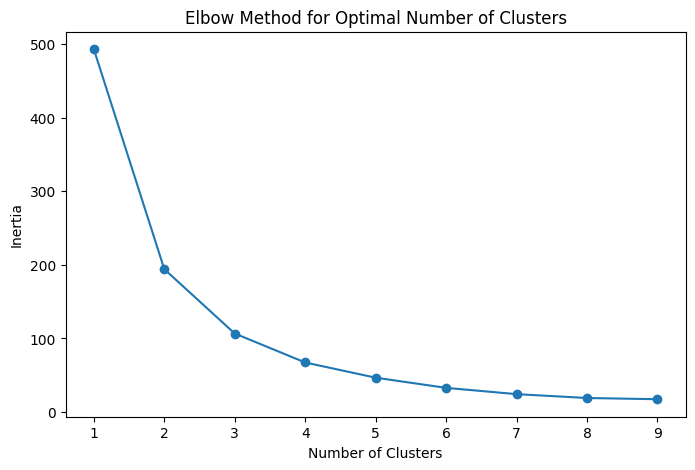

In [6]:
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,inertia,marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
optimal_clusters=3
kmeans=KMeans(n_clusters=optimal_clusters,random_state=42)
data['KMeans_Cluster']=kmeans.fit_predict(x_scaled)

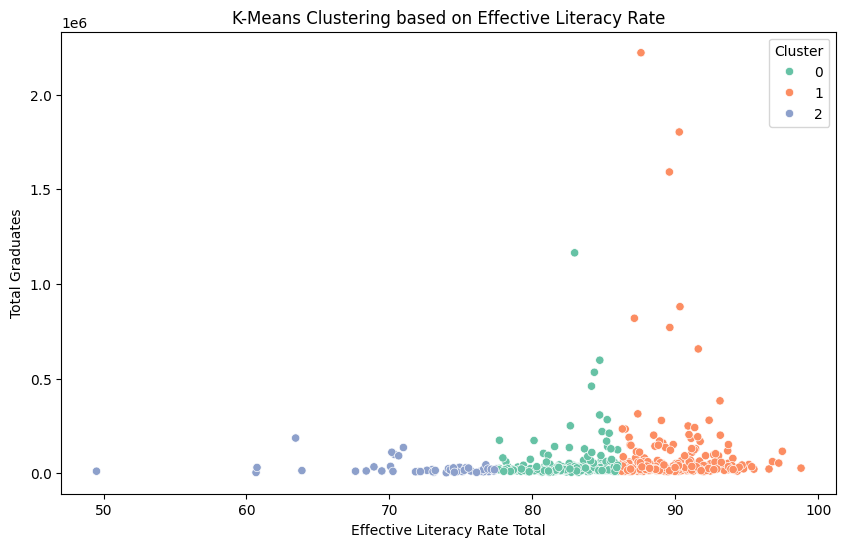

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='effective_literacy_rate_total',y='total_graduates', hue='KMeans_Cluster', palette='Set2')
plt.title('K-Means Clustering based on Effective Literacy Rate')
plt.xlabel('Effective Literacy Rate Total')
plt.ylabel('Total Graduates')
plt.legend(title='Cluster')
plt.show()